In [ ]:
https://cs50.harvard.edu/python/2022/psets/8/jar/

Suppose that you’d like to implement a cookie jar in which to store cookies. In a file called jar.py, implement a class called Jar with these methods:

    __init__ should initialize a cookie jar with the given capacity, which represents the maximum number of cookies that can fit in the cookie jar. If capacity is not a non-negative int, though, __init__ should instead raise a ValueError.
    __str__ should return a str with 

🍪, where

    is the number of cookies in the cookie jar. For instance, if there are 3 cookies in the cookie jar, then str should return "🍪🍪🍪"
    deposit should add n cookies to the cookie jar. If adding that many would exceed the cookie jar’s capacity, though, deposit should instead raise a ValueError.
    withdraw should remove n cookies from the cookie jar. Nom nom nom. If there aren’t that many cookies in the cookie jar, though, withdraw should instead raise a ValueError.
    capacity should return the cookie jar’s capacity.
    size should return the number of cookies actually in the cookie jar, initially 0.

Structure your class per the below. You may not alter these methods’ parameters, but you may add your own methods.

In [ ]:
class Jar:
    def __init__(self, capacity=12):
        ...

    def __str__(self):
        ...

    def deposit(self, n):
        ...

    def withdraw(self, n):
        ...

    @property
    def capacity(self):
        ...

    @property
    def size(self):
        ...


Either before or after you implement jar.py, additionally implement, in a file called test_jar.py, four or more functions that collectively test your implementation of Jar thoroughly, each of whose names should begin with test_ so that you can execute your tests with:

In [ ]:
pytest test_jar.py

Note that it’s not as easy to test instance methods as it is to test functions alone, since instance methods sometimes manipulate the same “state” (i.e., instance variables). To test one method (e.g., withdraw), then, you might need to call another method first (e.g., deposit). But the method you call first might itself not be correct!

And so programmers sometimes mock (i.e., simulate) state when testing methods, as with Python’s own mock object library, so that you can call just the one method but modify the underlying state first, without calling the other method to do so.

For simplicity, though, no need to mock any state. Implement your tests as you normally would!

# Hints

In [ ]:
from jar import Jar


def test_init():
    ...


def test_str():
    jar = Jar()
    assert str(jar) == ""
    jar.deposit(1)
    assert str(jar) == "🍪"
    jar.deposit(11)
    assert str(jar) == "🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪"


def test_deposit():
    ...


def test_withdraw():
    ...


# Solutions

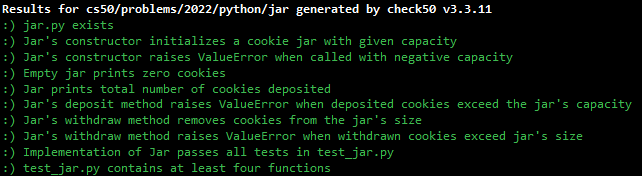

In [89]:
class Jar:
    def __init__(self, capacity=12):
        self.capacity = capacity
        self.size = 0

    def __str__(self):
        return '🍪' * self.size

    def deposit(self, n):
        self.size += n
        return self.size

    def withdraw(self, n):
        self.size -= n
        return self.size


    @property
    def capacity(self):
        return self._capacity

    @capacity.setter
    def capacity(self, capacity):
        if capacity < 1:
            raise ValueError("capacity must be at least 1")
        self._capacity = capacity


    @property
    def size(self):
        return self._size

    @size.setter
    def size(self, size):
        if size > self.capacity:
            raise ValueError("Overload of capacity")
        elif size < 0:
            raise ValueError("There aren't enough cookies")
        self._size = size

    # Funtion to sum different instaciated jar objects
    def __add__(self, other):
        # I Coul've done some condition to enlarge the capacity if it overloads, but I decided to keep it simple
        size = self.size + other.size
        other_jar = Jar()
        other_jar.deposit(size)
        return other_jar


def main():
    jar = Jar()
    jar.deposit(5)
    print(jar)
    jar.deposit(5)
    print(jar)
    # jar.deposit(8)
    # print(jar)
    jar.withdraw(9)
    print(jar)
    # jar.withdraw(2)
    # print(jar)

if __name__ == '__main__':
    main()

🍪🍪🍪🍪🍪
🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪
🍪


In [90]:
jar = Jar()
jar

In [91]:
print(jar)

In [92]:
jar2 = Jar()
jar2.deposit(5)
print(jar2)

🍪🍪🍪🍪🍪


In [93]:
jar.deposit(2)
print(jar)

🍪🍪


In [94]:
total = jar + jar2
print(total)

🍪🍪🍪🍪🍪🍪🍪


In [64]:
jar.capacity = 20
jar.capacity

20

In [65]:
jar.size

0

In [66]:
jar.withdraw(1)

ValueError: There aren't enough cookies

In [67]:
jar.deposit(18)
print(jar)

🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪🍪


# How to Test

Here’s how to test your code manually:

    Open your test_jar.py file and import your Jar class with from jar import Jar. Create a function called test_init, wherein you create a new instance of Jar with jar = Jar(). assert that this jar has the capacity it should, then run your tests with pytest test_jar.py.
    Add another function to your test_jar.py file called test_str. In test_str, create a new instance of your Jar class and deposit a few cookies. assert that str(jar) prints out as many cookies as have been deposited, then run your tests with pytest test_jar.py.
    Add another function to your test_jar.py file called test_deposit. In test_deposit, create a new instance of your Jar class and deposit a few cookies. assert that the jar’s size attribute is as large as the number of cookies that have been deposited. Also assert that, if you deposit more than the jar’s capacity, deposit should raise a ValueError. Run your tests with pytest test_jar.py.
    Add another function to your test_jar.py file called test_withdraw. In test_withdraw, create a new instance of your Jar class and first deposit a few cookies. assert that withdrawing from the jar leaves the appropriate number of cookies in the jar’s size attribute. Also assert that, if you withdraw more than the jar’s size, withdraw should raise a ValueError. Run your tests with pytest test_jar.py.
